<a href="https://colab.research.google.com/github/marcosjorgeff/marcosjorgeff/blob/Master/Imersao_dados_4_aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [ ]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [ ]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

In [ ]:
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [ ]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

##Desafio Aula 3

- Tentar vincular dados do IBGE com os dados de imóveis.
- Tratar os outliers e comparar com os resultados. 
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto. 


#Desafio 1

In [ ]:
# -*- coding: utf-8 -*-
ibge_url = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'

ibge = pd.read_csv(ibge_url, sep=';', encoding='utf-8')
ibge.drop(columns=['Cod_setor', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
      'Cod_RM', 'Nome_da_RM', 'Cod_distrito','Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Situacao_setor',
       'Tipo_setor','V001','V002','V003','V004','V005','V006','V007','V008','V009','V010','V011','V012'], inplace=True)


In [ ]:
ibge.head()

,Cod_Grandes Regi�es,Cod_municipio,Nome_do_municipio,Cod_bairro,Nome_do_bairro,Unnamed: 33
0,3,3550308,S�O PAULO,3550308000,S�O PAULO (todos os setores),NaN
1,3,3550308,S�O PAULO,3550308000,S�O PAULO (todos os setores),NaN
2,3,3550308,S�O PAULO,3550308000,S�O PAULO (todos os setores),NaN
3,3,3550308,S�O PAULO,3550308000,S�O PAULO (todos os setores),NaN
4,3,3550308,S�O PAULO,3550308000,S�O PAULO (todos os setores),NaN


Csv sem informação de bairro.
Não tem como efetuar a junção das tabelas

#Desafio 2

Tratando Metragem

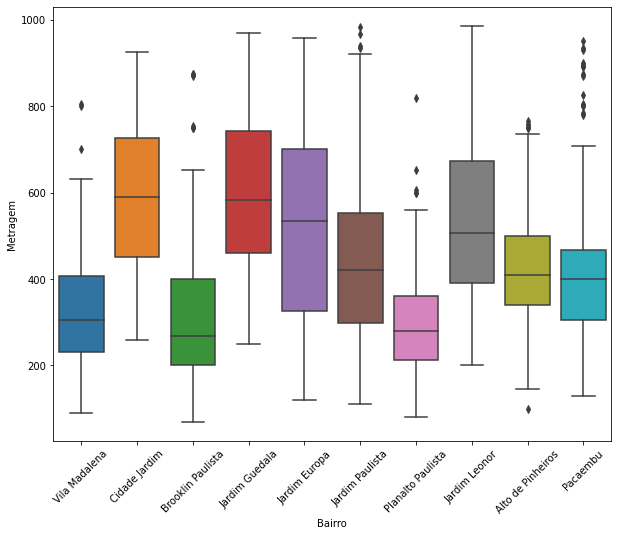

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 1000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

Tratando Quartos

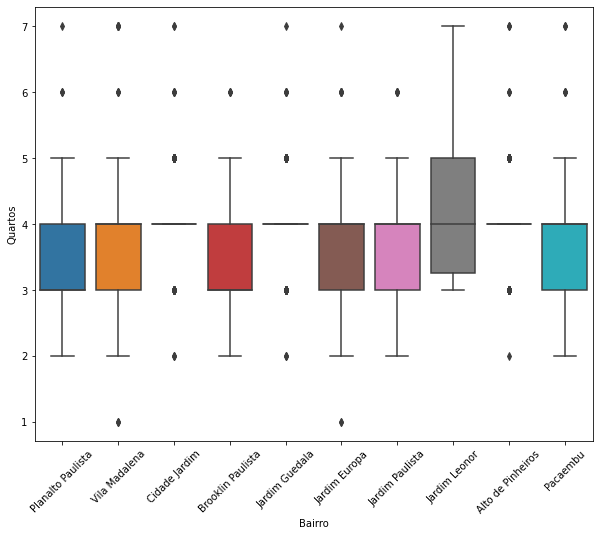

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Quartos < 8"), x="Bairro", y="Quartos")
ax.tick_params(axis='x', rotation=45)
plt.show()

Tratando Banheiros

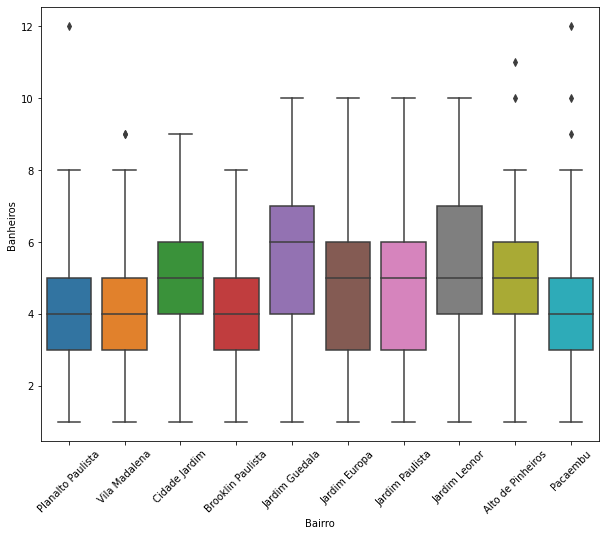

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Banheiros < 40"), x="Bairro", y="Banheiros")
ax.tick_params(axis='x', rotation=45)
plt.show()

Tratando Vagas

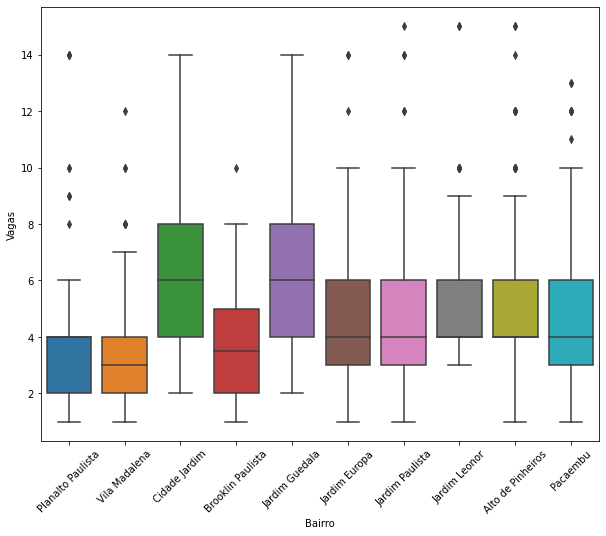

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Vagas < 16"), x="Bairro", y="Vagas")
ax.tick_params(axis='x', rotation=45)
plt.show()

#Desafio 3

In [ ]:
analise_jd_paulista = dados_vendas[dados_vendas.Bairro == "Jardim Paulista"]

In [ ]:
analise_jd_paulista.groupby(['Bairro', 'Vagas'])['Valor_m2'].describe()


count          mean          std           min  \
Bairro          Vagas                                                   
Jardim Paulista 1       22.0  14449.215673  2608.013263  10285.714286   
                2       36.0  14458.532764  4746.732853   7261.363636   
                3       42.0  16379.555688  5559.519350   9705.882353   
                4       69.0  17605.435988  6300.338394   4888.888889   
                5       19.0  15514.192639  5829.356194   8888.888889   
                6       36.0  16762.017189  8620.856203   8130.081301   
                7       14.0  13602.711128  6654.100992   7912.087912   
                8       14.0  17996.558004  3755.544234  13131.578947   
                9        3.0  13355.365622  2689.809380  10251.282051   
                10       6.0  14420.546420  3473.533774   8888.888889   
                12       2.0  15450.771056  1719.536063  14234.875445   
                14       2.0  13305.670816    39.120707  13278.008299   
                15       1.0  13461.538462          NaN  13461.538462   

                                25%           50%           75%           max  
Bairro          Vagas                                                          
Jardim Paulista 1      13066.326531  13446.771379  16747.311828  18978.102190  
                2      11610.294118  14346.726763  16453.903654  31315.789474  
                3      11988.636364  15508.620690  18333.333333  33725.490196  
                4      12416.107383  18375.241779  21621.621622  34957.627119  
                5      10357.142857  16469.194313  20175.438596  28301.886792  
                6      11800.465839  14285.714286  16438.432836  38297.872340  
                7       8087.912088  10698.315940  16966.618287  28888.888889  
                8      15113.636364  17400.889915  20539.726027  25853.154085  
                9      12533.048433  14814.814815  14907.407407  15000.000000  
                10     12946.428571  15084.033613  15882.352941  19083.969466  
                12     14842.823250  15450.771056  16058.718861  16666.666667  
                14     13291.839557  13305.670816  13319.502075  13333.333333  
                15     13461.538462  13461.538462  13461.538462  13461.538462

Q Quantidade de Vagas não interfere no Vamor m2 no bairro Jardim Paulista

In [ ]:
analise_jd_paulista.groupby(['Bairro', 'Quartos'])['Valor_m2'].describe()

count          mean          std           min  \
Bairro          Quartos                                                   
Jardim Paulista 2         13.0  16529.676558  2603.455712  11666.666667   
                3         89.0  15148.840801  5460.255412   7912.087912   
                4        122.0  16516.887635  6436.625441   4888.888889   
                5         29.0  17283.996132  6759.536950   7960.199005   
                6          6.0  11261.817594  1243.364532   9800.000000   
                8          1.0  13000.000000          NaN  13000.000000   
                9          5.0  18074.718083   991.023767  16774.193548   
                13         1.0  28888.888889          NaN  28888.888889   

                                  25%           50%           75%  \
Bairro          Quartos                                             
Jardim Paulista 2        16000.000000  16909.090909  17948.717949   
                3        11745.098039  13560.209424  16703.786192   
                4        12012.684989  16324.404762  19298.245614   
                5        12834.224599  15000.000000  23478.260870   
                6        10361.344538  11044.117647  12377.262443   
                8        13000.000000  13000.000000  13000.000000   
                9        17333.333333  18309.859155  18978.102190   
                13       28888.888889  28888.888889  28888.888889   

                                  max  
Bairro          Quartos                
Jardim Paulista 2        20462.427746  
                3        34957.627119  
                4        38297.872340  
                5        28301.886792  
                6        12727.272727  
                8        13000.000000  
                9        18978.102190  
                13       28888.888889

Analisar os dados dos imoveis com 6,8 e 9 Quartos pois estão abaixo da media dos com 2 quartos